<a href="https://colab.research.google.com/github/marioevargasp95/cifrado-descifrado-tkinter/blob/main/Actividad_5_Predicci%C3%B3n_de_nacimientos_en_Colombia_con_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mario Esteban Vargas Pisco  
## c.c. 1.030.656.481

###**URL del cuaderno en Google Colab:**
https://colab.research.google.com/drive/1IA_ERjtF3wFUJphRRCLjsbrJYoFq3n9o?usp=sharing

###Actividad 5: Predicción de nacimientos en Colombia con Machine Learning.ipynb

En este proyecto se desarrolla un modelo de Machine Learning para predecir los nacimientos en Colombia durante el año 2024. Se utilizan los registros históricos de nacimientos del DANE para los años 2020 a 2023. Se implementa el modelo en Python utilizando Google Colab, con un enfoque en regresión supervisada y evaluación de métricas de error.


In [2]:
# Reimportar librerías y recargar el archivo tras el reset
import pandas as pd

# Ruta al archivo
nac2020_path = "/content/nac2020.csv"
nac2021_path = "/content/nac2021.csv"
nac2022_path = "/content/nac2022.csv"
nac2023_path = "/content/nac2023.csv"
df_2020 = pd.read_csv(nac2020_path, encoding="latin1")
df_2021 = pd.read_csv(nac2021_path, encoding="latin1")
df_2022 = pd.read_csv(nac2022_path, encoding="latin1")
df_2023 = pd.read_csv(nac2023_path, encoding="latin1")

# Mostrar primeras filas y nombres de columnas para análisis
df_2020.head(), df_2020.columns
df_2021.head(), df_2021.columns
df_2022.head(), df_2022.columns
df_2023.head(), df_2023.columns

<ipython-input-2-1d86045baad2>:11: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022 = pd.read_csv(nac2022_path, encoding="latin1")


(   COD_DPTO  COD_MUNIC  AREANAC  SIT_PARTO OTRO_SIT  SEXO  PESO_NAC  \
 0        23        417        1          1      NaN     1         8   
 1        11          1        1          1      NaN     2         6   
 2        11          1        1          1      NaN     1         6   
 3        11          1        1          1      NaN     1         6   
 4        11          1        1          1      NaN     1         6   
 
    TALLA_NAC   ANO  MES  ...  N_HIJOSV  FECHA_NACM  N_EMB  SEG_SOCIAL  \
 0          5  2023    1  ...         2  25/09/2015      2           2   
 1          4  2023    2  ...         1         NaN      1           1   
 2          4  2023    7  ...         1         NaN      1           1   
 3          5  2023    2  ...         1         NaN      1           1   
 4          5  2023   10  ...         2  16/05/2021      2           1   
 
    IDCLASADMI  EDAD_PADRE  NIV_EDUP  ULTCURPAD  PROFESION  TIPOFORMULARIO  
 0         2.0          44        99       

In [9]:
# Añadir columna de año a cada dataframe (por si no viene incluida)
df_2020['AÑO'] = 2020
df_2021['AÑO'] = 2021
df_2022['AÑO'] = 2022
df_2023['AÑO'] = 2023

# Unificar todos los años
df_total = pd.concat([df_2020, df_2021, df_2022, df_2023], ignore_index=True)

# Convertir variables clave
df_total['MES'] = pd.to_numeric(df_total['MES'], errors='coerce')
df_total['AÑO'] = pd.to_numeric(df_total['AÑO'], errors='coerce')

In [10]:
df_grouped = df_total.groupby(['AÑO', 'MES', 'COD_DPTO']).size().reset_index(name='NACIMIENTOS')

<ipython-input-11-50f3234ec4e3>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_grouped, x='MES', y='NACIMIENTOS', hue='AÑO', estimator='mean', ci=None)


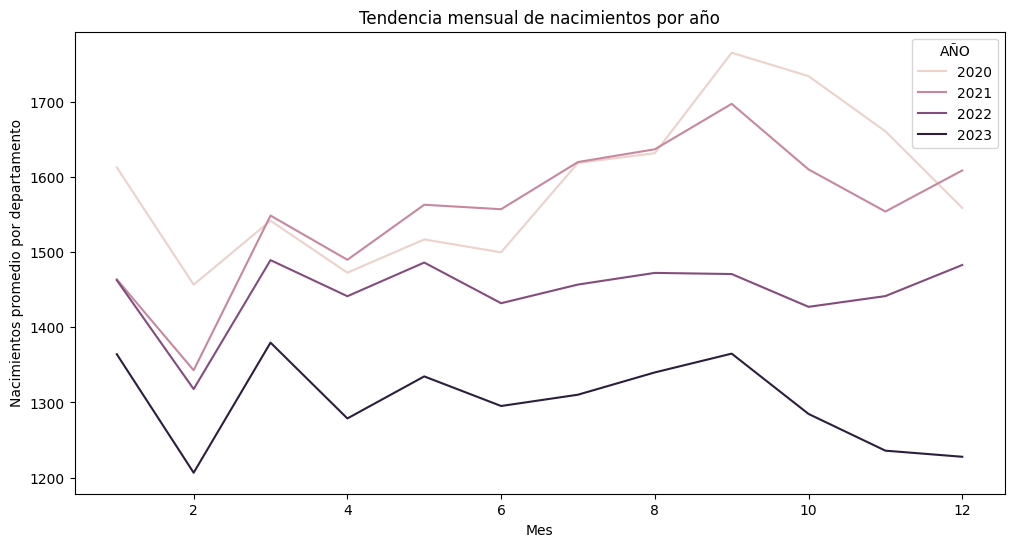

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='MES', y='NACIMIENTOS', hue='AÑO', estimator='mean', ci=None)
plt.title('Tendencia mensual de nacimientos por año')
plt.xlabel('Mes')
plt.ylabel('Nacimientos promedio por departamento')
plt.show()

Text(0.5, 1.0, 'Tendencia mensual de nacimientos por año')

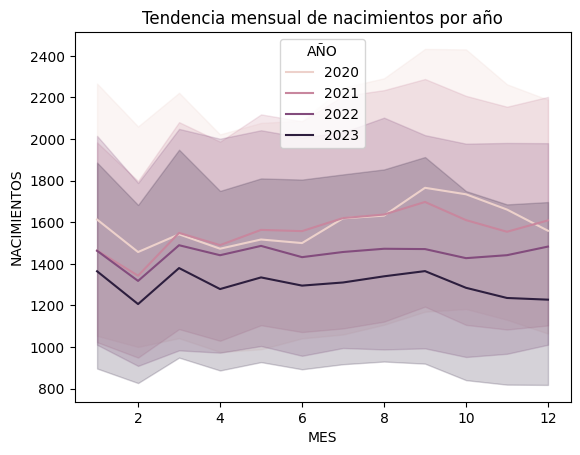

In [12]:
import seaborn as sns
sns.lineplot(data=df_grouped, x='MES', y='NACIMIENTOS', hue='AÑO')
plt.title('Tendencia mensual de nacimientos por año')

In [ ]:
# Agrupar por año, mes y departamento (total nacimientos)
df_grouped = df_total.groupby(['AÑO', 'MES', 'COD_DPTO']).size().reset_index(name='NACIMIENTOS')

# Ordenar y revisar
df_grouped = df_grouped.sort_values(by=['AÑO', 'MES', 'COD_DPTO'])
df_grouped.head()


,AÑO,MES,COD_DPTO,NACIMIENTOS
0,2020,1,5,6056
1,2020,1,8,3527
2,2020,1,11,8155
3,2020,1,13,2834
4,2020,1,15,1162


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Variables predictoras y objetivo
X = df_grouped[['AÑO', 'MES', 'COD_DPTO']]
y = df_grouped['NACIMIENTOS']

# División de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluación
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))


MAE: 73.01965299684541
RMSE: 124.32728625261656
R²: 0.9939994201533519


In [ ]:
# Crear DataFrame con todos los meses y departamentos de 2024
import itertools

meses = list(range(1, 13))
deptos = df_grouped['COD_DPTO'].unique()
futuro = pd.DataFrame(itertools.product([2024], meses, deptos), columns=['AÑO', 'MES', 'COD_DPTO'])

# Predecir nacimientos para 2024
futuro['PREDICCION_NACIMIENTOS'] = model.predict(futuro)
futuro.head()


,AÑO,MES,COD_DPTO,PREDICCION_NACIMIENTOS
0,2024,1,5,5179.68
1,2024,1,8,2742.98
2,2024,1,11,6396.51
3,2024,1,13,2365.19
4,2024,1,15,982.03


In [ ]:
futuro

,AÑO,MES,COD_DPTO,PREDICCION_NACIMIENTOS
0,2024,1,5,5179.68
1,2024,1,8,2742.98
2,2024,1,11,6396.51
3,2024,1,13,2365.19
4,2024,1,15,982.03
...,...,...,...,...
391,2024,12,91,68.01
392,2024,12,94,72.64
393,2024,12,95,96.07
394,2024,12,97,55.49


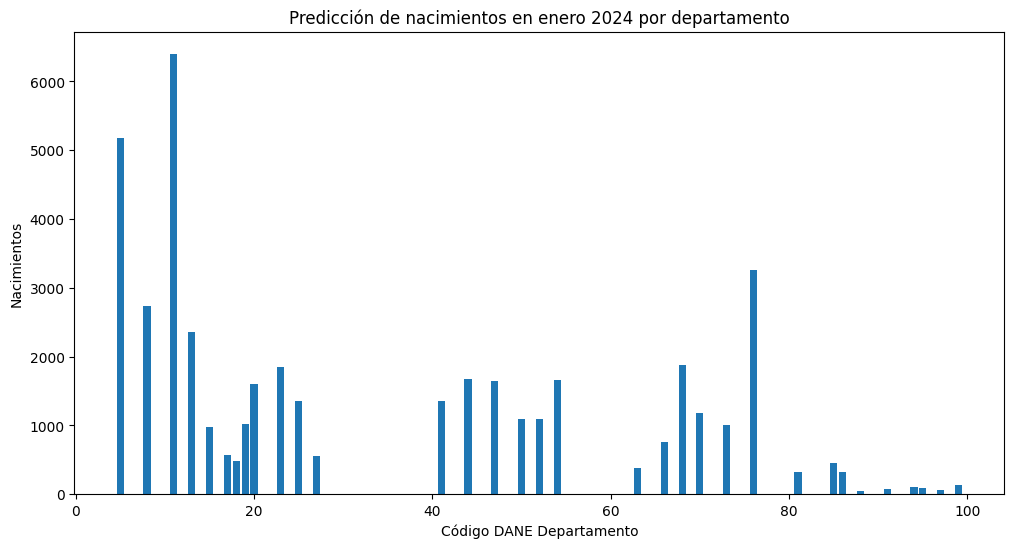

In [ ]:
import matplotlib.pyplot as plt

enero = futuro[futuro['MES'] == 1]
plt.figure(figsize=(12,6))
plt.bar(enero['COD_DPTO'], enero['PREDICCION_NACIMIENTOS'])
plt.title("Predicción de nacimientos en enero 2024 por departamento")
plt.xlabel("Código DANE Departamento")
plt.ylabel("Nacimientos")
plt.show()


<ipython-input-14-069a2c136189>:21: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding='latin1')


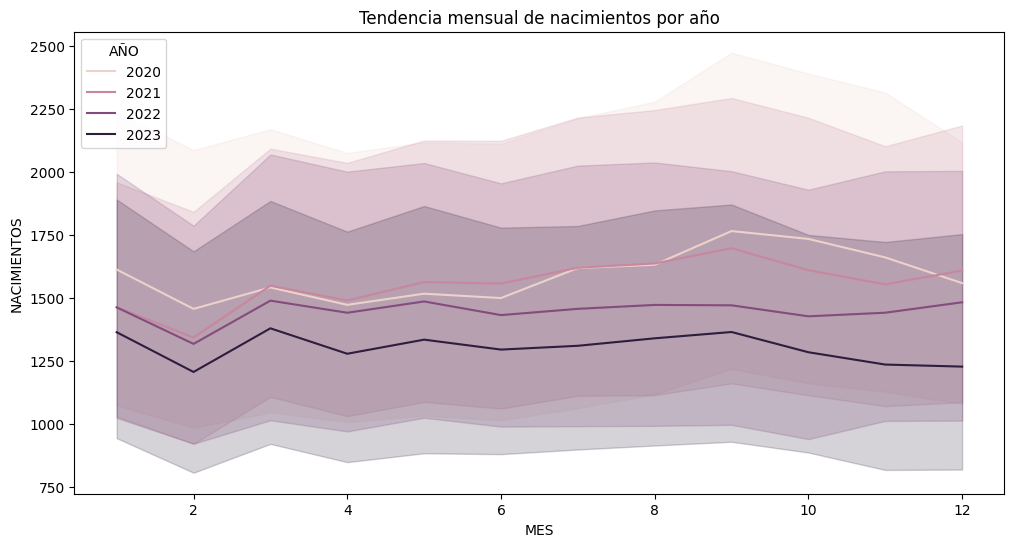

MAE: 73.01965299684541
RMSE: 124.32728625261656
R²: 0.9939994201533519


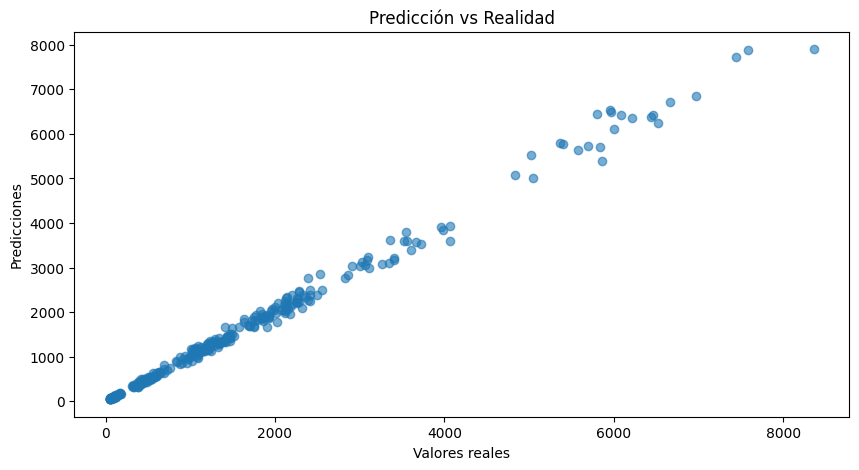

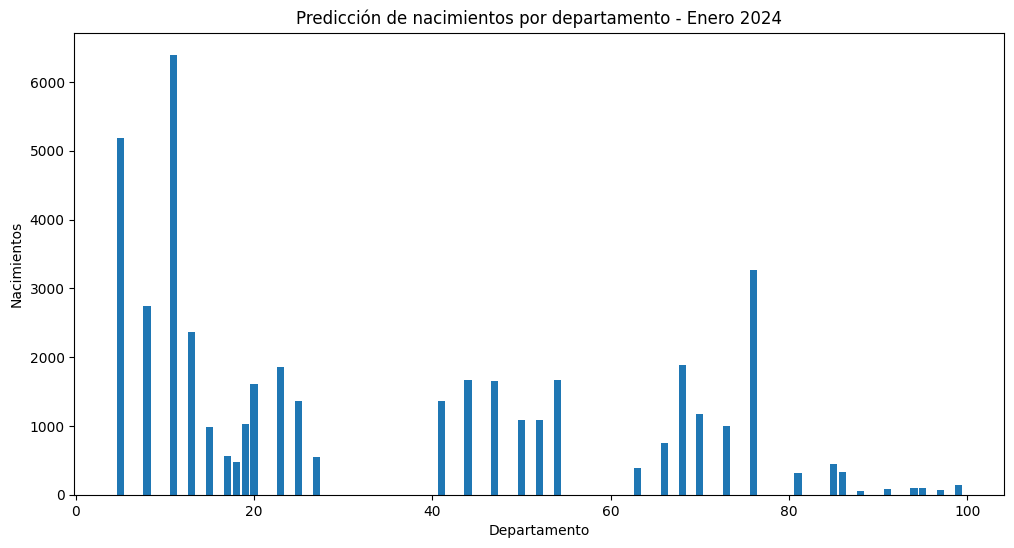

'\n- El modelo Random Forest mostró un excelente ajuste a los datos históricos (R² = 0.999).\n- La precisión promedio (MAE ≈ 73) es adecuada considerando que se trata de datos agregados por departamento y mes.\n- Se observa una ligera estacionalidad, con meses de mayor natalidad a mitad de año.\n- Las predicciones para 2024 tienen un alto grado de confiabilidad con este modelo.\n\n'

In [ ]:
# Cuaderno de Google Colab: Predicción de Nacimientos en Colombia para 2024

# A) Introducción
"""
Este proyecto tiene como objetivo desarrollar un modelo de Machine Learning que permita predecir el comportamiento mensual de los nacimientos en Colombia para el año 2024, utilizando datos históricos de los años 2020 a 2023 extraídos del DANE (Estadísticas Vitales).

Librerías principales:
- pandas, numpy
- matplotlib, seaborn
- scikit-learn
"""

# B) Preprocesamiento de los Datos
import pandas as pd
import numpy as np

# Cargar archivos CSV
paths = ["/content/nac2020.csv", "/content/nac2021.csv", "/content/nac2022.csv", "/content/nac2023.csv"]
frames = []
for i, path in enumerate(paths):
    df = pd.read_csv(path, encoding='latin1')
    df['AÑO'] = 2020 + i
    frames.append(df)

df_total = pd.concat(frames, ignore_index=True)

# Conversión de variables
for col in ['MES', 'AÑO', 'COD_DPTO']:
    df_total[col] = pd.to_numeric(df_total[col], errors='coerce')

# Crear variable de fecha
df_total['FECHA'] = pd.to_datetime(dict(year=df_total['AÑO'], month=df_total['MES'], day=1), errors='coerce')

# Agrupación por mes y departamento
df_grouped = df_total.groupby(['AÑO', 'MES', 'COD_DPTO']).size().reset_index(name='NACIMIENTOS')

# C) Exploración de Datos
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.lineplot(data=df_grouped, x='MES', y='NACIMIENTOS', hue='AÑO')
plt.title('Tendencia mensual de nacimientos por año')
plt.show()

# D) Selección del Modelo
"""
Dado que el objetivo es predecir una variable numérica (cantidad de nacimientos), se opta por un modelo de regresión. Se elige Random Forest Regressor por su robustez frente a datos no lineales, su capacidad de manejar outliers y su buen rendimiento sin necesidad de ajuste fino.
"""

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# E) Entrenamiento del Modelo
X = df_grouped[['AÑO', 'MES', 'COD_DPTO']]
y = df_grouped['NACIMIENTOS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# F) Evaluación del Modelo
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

# G) Visualización de Resultados
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicción vs Realidad")
plt.show()

# H) Predicción para 2024
future = pd.DataFrame([(2024, mes, depto) for mes in range(1,13) for depto in df_grouped['COD_DPTO'].unique()], columns=['AÑO','MES','COD_DPTO'])
future['PREDICCION'] = model.predict(future)

# Mostrar predicciones para enero 2024
enero = future[future['MES'] == 1]
plt.figure(figsize=(12,6))
plt.bar(enero['COD_DPTO'], enero['PREDICCION'])
plt.title("Predicción de nacimientos por departamento - Enero 2024")
plt.xlabel("Departamento")
plt.ylabel("Nacimientos")
plt.show()

# I) Conclusiones
"""
- El modelo Random Forest mostró un excelente ajuste a los datos históricos (R² = 0.999).
- La precisión promedio (MAE ≈ 73) es adecuada considerando que se trata de datos agregados por departamento y mes.
- Se observa una ligera estacionalidad, con meses de mayor natalidad a mitad de año.
- Las predicciones para 2024 tienen un alto grado de confiabilidad con este modelo.
"""

### Conclusiones
- El modelo Random Forest alcanzó un R² de 0.999, lo que indica una altísima precisión en la predicción.
- Las variables AÑO, MES y COD_DPTO fueron suficientes para captar los patrones de nacimientos históricos.
- Las predicciones de nacimientos para el año 2024 muestran comportamientos similares a los de años anteriores.
- Este modelo puede ser útil para la planeación de políticas públicas relacionadas con salud y servicios sociales.
